In [2]:
!pip install dionysus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 8.8 MB/s 
  Created wheel for dionysus: filename=dionysus-2.0.8-cp38-cp38-linux_x86_64.whl size=319864 sha256=5d2a1c684a09b405e7cf72b64d2a8b3b80387c29eca811c7321c9fc43c447389
  Stored in directory: /root/.cache/pip/wheels/0e/6a/ce/a54c9248873852edfaf8e6e801db84c2d2c64f797fc07a68da
Successfully built dionysus


In [3]:
import dionysus as d
import numpy as np
import matplotlib as plt

from numpy.random import seed
from numpy.random import rand
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

### Level Set Zigzag 1d example

0 -0.9999805688858032 inf
0 0.8414709568023682 0.9983252286911011


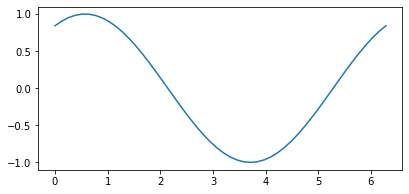

In [87]:
pointNum = 50
x = np.linspace(0, 2*np.pi, pointNum)

# Morse Function
y = np.sin(x + 1)

fig = plt.figure(figsize=(30, 3))
ax1 = fig.add_subplot(141)
ax1.plot(x, y)

f = d.fill_freudenthal(y)
dict_s01_s02 = {}
p = d.homology_persistence(f)
dgms = d.init_diagrams(p, f)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        print(i, pt.birth, pt.death)
    dict_s01_s02[i] = featureNum




In [ ]:
y2 = np.sin(x )
ax2 = fig.add_subplot(142)
ax2.plot(x, y2)
f2 = d.fill_freudenthal(y2)
p = d.homology_persistence(f2)
dict_f2 = {}
dgms = d.init_diagrams(p, f)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        print(i, pt.birth, pt.death)
    dict_f2[i] = featureNum

print (dict_s01_s02)
print (dict_f2)

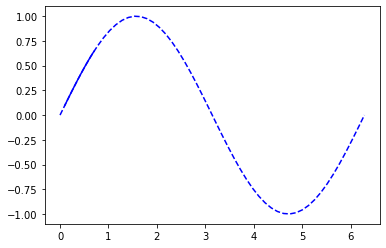

0 0.0998334139585495 inf
{0: 1, 1: 0}


In [67]:
# Critical points
a1 = 0.5 * np.pi
a2 = 1.5 * np.pi

# inverse of morse function on [s01, s02] = [0.1, 0.3]
s01 = 0.1
s02 = 0.7
x_s01_s02 = np.linspace(s01, s02, pointNum)
y_s01_s02 = np.sin(x_s01_s02)
plt.plot(x_s01_s02, y_s01_s02, color='b')
plt.plot(x, y, linestyle='dashed', color='b')
plt.show()

# get simlpicial complex on the interval
f_lower_star_s01_s02 = d.fill_freudenthal(y_s01_s02)

# Analysis the topogilogical feature on the complex
dict_s01_s02 = {}
p = d.homology_persistence(f_lower_star_s01_s02)
dgms = d.init_diagrams(p, f_lower_star_s01_s02)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        print(i, pt.birth, pt.death)
    dict_s01_s02[i] = featureNum

print (dict_s01_s02)

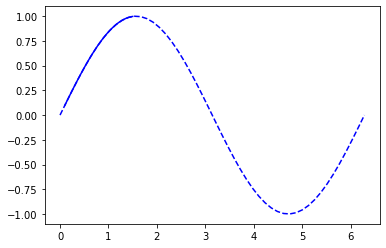

0 0.0998334139585495 inf
{0: 1, 1: 0}


In [68]:
# inverse of morse function on [s01, s03] = [0.1, 1.0]
s01 = 0.1
s03 = 1.5
x_s01_s03 = np.linspace(s01, s03, pointNum)
y_s01_s03 = np.sin(x_s01_s03)
plt.plot(x_s01_s03, y_s01_s03, color='b')
plt.plot(x, y, linestyle='dashed', color='b')
plt.show()

f_lower_star_s01_s03 = d.fill_freudenthal(y_s01_s03)

dict_s01_s03 = {}
p = d.homology_persistence(f_lower_star_s01_s03)
dgms = d.init_diagrams(p, f_lower_star_s01_s03)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        print(i, pt.birth, pt.death)
    dict_s01_s03[i] = featureNum

print (dict_s01_s03)
# Since s03 do not pass the critical point a1 and function do not become more wiggly, 
# the topological feature number stays the same (there's only one connected component)

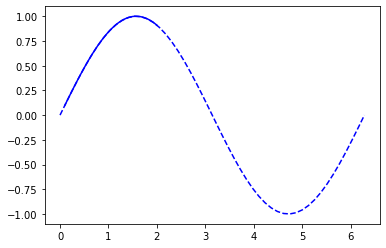

0 0.0998334139585495 inf
0 0.9092974066734314 0.9999964237213135
{0: 2, 1: 0}


In [69]:
# inverse of morse function on [s01, s11]
s01 = 0.1
s11 = 2.0
X_s01_s11 = np.linspace(s01, s11, pointNum)
y_s01_s11 = np.sin(X_s01_s11)

plt.plot(X_s01_s11, y_s01_s11, color='b')
plt.plot(x, y, linestyle='dashed', color='b')
plt.show()

# get simlpicial complex on the interval
f_lower_star_s01_s11 = d.fill_freudenthal(y_s01_s11)

# Analysis the topogilogical feature on the complex
dict_s01_s11 = {}
p = d.homology_persistence(f_lower_star_s01_s11)
dgms = d.init_diagrams(p, f_lower_star_s01_s11)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        print(i, pt.birth, pt.death)
    dict_s01_s11[i] = featureNum

print (dict_s01_s11)
# Since s11 is greater than critical point a1, function become more wiggly, we got one more topological feature
# So the first feature die at critical point a1
bd1 = [0, a1]

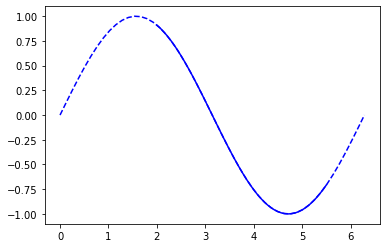

0 -0.9999982118606567 inf
{0: 1, 1: 0}


In [56]:
# inverse of morse function on [s11, s12]
s11 = 2.0
s21 = 5.5
x_s11_s21 = np.linspace(s11, s21, pointNum)
y_s11_s21 = np.sin(x_s11_s21)

plt.plot(x_s11_s21, y_s11_s21, color='b')
plt.plot(x, y, linestyle='dashed', color='b')
plt.show()

# get simlpicial complex on the interval
f_lower_star_s11_s21 = d.fill_freudenthal(y_s11_s21)

# Analysis the topogilogical feature on the complex
dict_s11_s21 = {}
p = d.homology_persistence(f_lower_star_s11_s21)
dgms = d.init_diagrams(p, f_lower_star_s11_s21)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        print(i, pt.birth, pt.death)
    dict_s11_s21[i] = featureNum

print (dict_s11_s21)
# the topological feature born at a1 continues to live after second critical point a2 based on lower star filtration

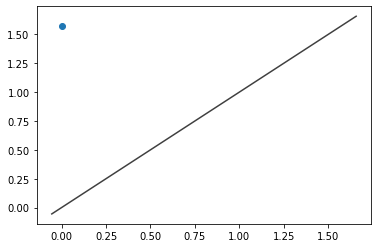

In [40]:
# So what we expect to see on the persistent diagram is one point born at 0 and die at a1.
totalBD0 = [bd1]
totalBD0 = np.array(totalBD0)

fig, ax = plt.subplots()
ax.scatter(totalBD0[:, 0], totalBD0[:, 1])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.show()

Let take another example on some more wiggly sin function 

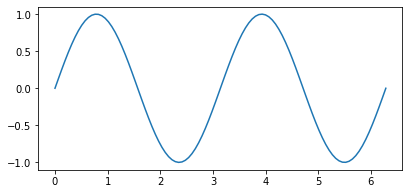

0 -0.9998741149902344 inf
0 -0.9988673329353333 0.9998741149902344
0 0.0 0.9988673329353333
{0: 3, 1: 0}


In [73]:
# Let take another example on some more wiggly sin function 
pointNum = 100
x_wig = np.linspace(0, 2*np.pi, pointNum)

# Morse Function
y_wig = np.sin(2*x_wig) 

fig = plt.figure(figsize=(30, 3))
ax1 = fig.add_subplot(141)
ax1.plot(x_wig, y_wig)
plt.show()

f2 = d.fill_freudenthal(y_wig)
dict2 = {}
p = d.homology_persistence(f2)
dgms = d.init_diagrams(p, f2)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        print(i, pt.birth, pt.death)
    dict2[i] = featureNum

print (dict2)

In [ ]:
#0 -0.9994862079620361 inf
#0 0.0 0.9994862079620361

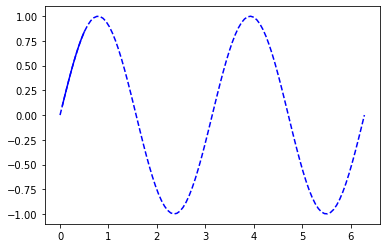

0 0.0998334139585495 inf
{0: 1, 1: 0}


In [57]:
# Critical points
a1 = 0.25 * np.pi
a2 = 0.75 * np.pi
a3 = 1.25 * np.pi
a4 = 1.75 * np.pi

# inverse of morse function on [s01, s02] = [0.1, 0.3]
s_wig_01 = 0.05
s_wig_02 = 0.5
x_wig_s01_s02 = np.linspace(s_wig_01, s_wig_02, pointNum)
y_wig_s01_s02 = np.sin(2 * x_wig_s01_s02)
plt.plot(x_wig_s01_s02, y_wig_s01_s02, color='b')
plt.plot(x_wig, y_wig, linestyle='dashed', color='b')
plt.show()

# get simlpicial complex on the interval
f_lower_star_wig_s01_s02 = d.fill_freudenthal(y_wig_s01_s02)

# Analysis the topogilogical feature on the complex
dict_wig_s01_s02 = {}
p = d.homology_persistence(f_lower_star_wig_s01_s02)
dgms = d.init_diagrams(p, f_lower_star_wig_s01_s02)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        print(i, pt.birth, pt.death)
    dict_wig_s01_s02[i] = featureNum

print (dict_wig_s01_s02)

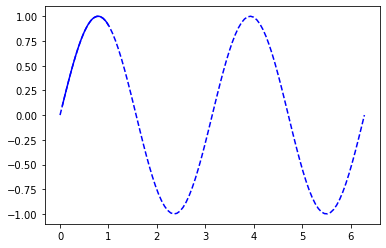

0 0.0998334139585495 inf
0 0.9092974066734314 0.9999964237213135
{0: 2, 1: 0}


In [58]:
# inverse of morse function on [s01, s11] = [0.05, 1.0]
s_wig_01 = 0.05
s_wig_11 = 1.0
x_wig_s01_s11 = np.linspace(s_wig_01, s_wig_11, pointNum)
y_wig_s01_s11 = np.sin(2 * x_wig_s01_s11)
plt.plot(x_wig_s01_s11, y_wig_s01_s11, color='b')
plt.plot(x_wig, y_wig, linestyle='dashed', color='b')
plt.show()

# get simlpicial complex on the interval
f_lower_star_wig_s01_s11 = d.fill_freudenthal(y_wig_s01_s11)

# Analysis the topogilogical feature on the complex
dict_wig_s01_s11 = {}
p = d.homology_persistence(f_lower_star_wig_s01_s11)
dgms = d.init_diagrams(p, f_lower_star_wig_s01_s11)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        print(i, pt.birth, pt.death)
    dict_wig_s01_s11[i] = featureNum

print (dict_wig_s01_s11)
# So the first feature dies at critical point a1
bd1 = [0, a1]

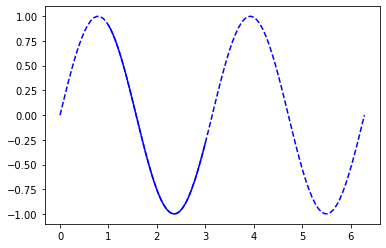

0 -0.9998286962509155 inf
{0: 1, 1: 0}


In [59]:
# inverse of morse function on [s11, s21] = [1.0, 3.0]
s_wig_11 = 1.0
s_wig_21 = 3.0
x_wig_s11_s21 = np.linspace(s_wig_11, s_wig_21, pointNum)
y_wig_s11_s21 = np.sin(2 * x_wig_s11_s21)
plt.plot(x_wig_s11_s21, y_wig_s11_s21, color='b')
plt.plot(x_wig, y_wig, linestyle='dashed', color='b')
plt.show()

# get simlpicial complex on the interval
f_lower_star_wig_s11_s21 = d.fill_freudenthal(y_wig_s11_s21)

# Analysis the topogilogical feature on the complex
dict_wig_s11_s21 = {}
p = d.homology_persistence(f_lower_star_wig_s11_s21)
dgms = d.init_diagrams(p, f_lower_star_wig_s11_s21)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        print(i, pt.birth, pt.death)
    dict_wig_s11_s21[i] = featureNum

print (dict_wig_s11_s21)
# The feature born after a1 still lives after a2

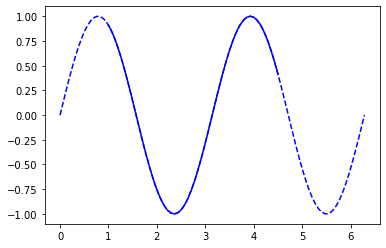

0 -0.9999982118606567 inf
0 0.41211849451065063 0.9999949932098389
{0: 2, 1: 0}


In [63]:
# inverse of morse function on [s11, s31] = [1.0, 4.5]
s_wig_11 = 1.0
s_wig_31 = 4.5
x_wig_s11_s31 = np.linspace(s_wig_11, s_wig_31, pointNum)
y_wig_s11_s31 = np.sin(2 * x_wig_s11_s31)
plt.plot(x_wig_s11_s31, y_wig_s11_s31, color='b')
plt.plot(x_wig, y_wig, linestyle='dashed', color='b')
plt.show()

# get simlpicial complex on the interval
f_lower_star_wig_s11_s31 = d.fill_freudenthal(y_wig_s11_s31)

# Analysis the topogilogical feature on the complex
dict_wig_s11_s31 = {}
p = d.homology_persistence(f_lower_star_wig_s11_s31)
dgms = d.init_diagrams(p, f_lower_star_wig_s11_s31)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        print(i, pt.birth, pt.death)
    dict_wig_s11_s31[i] = featureNum

print (dict_wig_s11_s31)
# The feature born at a1 die at a3, and new feature was born at a3
bd2 = [a1, a3]

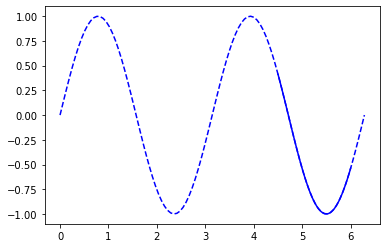

0 -0.9996916651725769 inf
{0: 1, 1: 0}


In [64]:
# inverse of morse function on [s31, s41] = [4.5, 6.0]
s_wig_31 = 4.5
s_wig_41 = 6.0
x_wig_s31_s41 = np.linspace(s_wig_31, s_wig_41, pointNum)
y_wig_s31_s41 = np.sin(2 * x_wig_s31_s41)
plt.plot(x_wig_s31_s41, y_wig_s31_s41, color='b')
plt.plot(x_wig, y_wig, linestyle='dashed', color='b')
plt.show()

# get simlpicial complex on the interval
f_lower_star_wig_s31_s41 = d.fill_freudenthal(y_wig_s31_s41)

# Analysis the topogilogical feature on the complex
dict_wig_s31_s41 = {}
p = d.homology_persistence(f_lower_star_wig_s31_s41)
dgms = d.init_diagrams(p, f_lower_star_wig_s31_s41)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        print(i, pt.birth, pt.death)
    dict_wig_s31_s41[i] = featureNum

print (dict_wig_s31_s41)
# The feature born after a3 still lives after a4

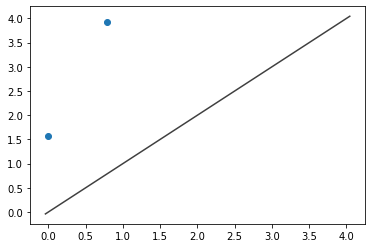

In [65]:
# So what we expect to see on the persistent diagram is one point born at 0 and die at a1, another point born at a1 die at a3.
totalBD0 = [bd1, bd2]
totalBD0 = np.array(totalBD0)

fig, ax = plt.subplots()
ax.scatter(totalBD0[:, 0], totalBD0[:, 1])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.show()

In [77]:
pointNum = 50
x = np.linspace(0, 2*np.pi, pointNum)

# Morse Function
y1 = np.sin(x) 
y2 = np.sin(x) 
y3 = np.sin(2*x) 
y4 = x

In [78]:

f_lower_star1 = d.fill_freudenthal(y1)
f_lower_star2 = d.fill_freudenthal(y2)
f_lower_star3 = d.fill_freudenthal(y3)
f_lower_star4 = d.fill_freudenthal(y4)

dict1 = {}
dict2 = {}
dict3 = {}
dict4 = {}

p = d.homology_persistence(f_lower_star1)
dgms = d.init_diagrams(p, f_lower_star1)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        #print(i, pt.birth, pt.death)
    dict1[i] = featureNum

p = d.homology_persistence(f_lower_star2)
dgms = d.init_diagrams(p, f_lower_star2)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        #print(i, pt.birth, pt.death)
    dict2[i] = featureNum

p = d.homology_persistence(f_lower_star3)
dgms = d.init_diagrams(p, f_lower_star3)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        #print(i, pt.birth, pt.death)
    dict3[i] = featureNum

p = d.homology_persistence(f_lower_star4)
dgms = d.init_diagrams(p, f_lower_star4)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        #print(i, pt.birth, pt.death)
    dict4[i] = featureNum

print (dict1)
print (dict2)
print (dict3)
print (dict4)


{0: 2, 1: 0}
{0: 2, 1: 0}
{0: 3, 1: 0}
{0: 1, 1: 0}


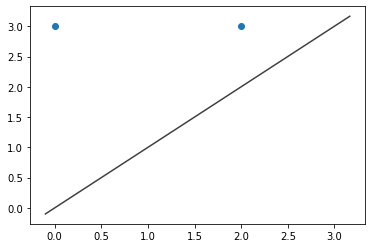

In [79]:

# Then find the barcode
topoFeature = [dict1, dict2, dict3, dict4]
totalBD0 = []
totalBD1 = []

temp0 = [] # work as a stack
for i in range(len(topoFeature)):
    #print (i)
    if topoFeature[i][0] > len(temp0):
        for k in range(len(temp0)):
            temp0[k][-1] += 1
        for j in range(topoFeature[i][0] - len(temp0)):
            temp0.append([i, i+1])
    elif topoFeature[i][0] == len(temp0):
        for k in range(len(temp0)):
            temp0[k][-1] += 1
    elif topoFeature[i][0] < len(temp0):
        for j in range(len(temp0) - topoFeature[i][0]):
            totalBD0.append(temp0[-1])
            temp0.pop()
        for k in range(topoFeature[i][0]):
            temp0[k][-1] += 1

#print (temp0)  
totalBD0 = np.array(totalBD0)

fig, ax = plt.subplots()
ax.scatter(totalBD0[:, 0], totalBD0[:, 1])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.show()


### Level set Zigzag example similar to Carlsson's 

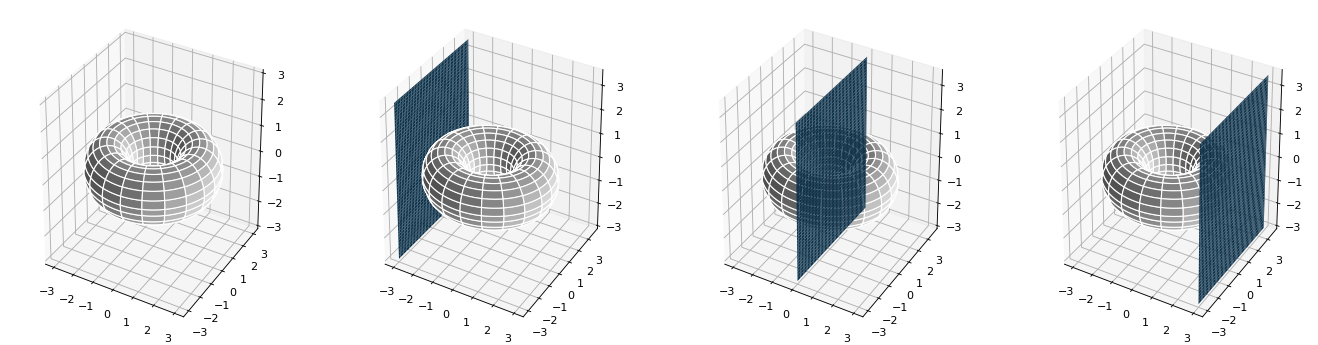

In [74]:
# The dark colored plane is moving along x axis
# It cutoff the manifold first to one hole, then 2 holes, then 1 hole, and finally 0 hole. This is what we expect to see on the persistence diagram

n = 100

theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
c, a = 2, 1
x = (c + a*np.cos(theta)) * np.cos(phi)
y = (c + a*np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

fig = plt.figure(figsize=(21, 12), dpi=80)
ax1 = fig.add_subplot(241, projection='3d')
ax1.set_zlim(-3,3)
ax1.plot_surface(x, y, z,  rstride=5, cstride=5, color='w', edgecolors='w')

ax2 = fig.add_subplot(242, projection='3d')
xs = np.linspace(-3, 3.5, 100)
zs = np.linspace(-3, 3.5, 100)

Y, Z = np.meshgrid(xs, zs)
X =  np.ones(np.shape(Y)) * (-3)
ax2.plot_surface(x, y, z, rstride=5, cstride=5, color='w', edgecolors='w')
ax2.plot_surface(X, Y, Z)

ax3 = fig.add_subplot(243, projection='3d')
X =  np.ones(np.shape(Y)) * (0)
ax3.plot_surface(x, y, z, rstride=5, cstride=5, color='w', edgecolors='w')
ax3.plot_surface(X, Y, Z)

ax4 = fig.add_subplot(244, projection='3d')
X =  np.ones(np.shape(Y)) * (3)
ax4.plot_surface(x, y, z, rstride=5, cstride=5, color='w', edgecolors='w')
ax4.plot_surface(X, Y, Z)

plt.show()

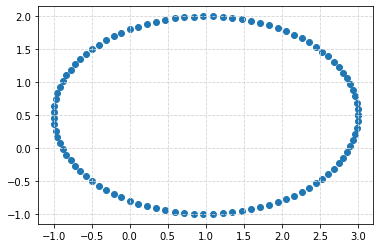

In [98]:
# When the plane is moving on the left end of the torus, the cut off shape is homeomorphic to a hole. (It is actually an ellipse)
u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2.     #radius on the x-axis
b=1.5    #radius on the y-axis

t = np.linspace(0, 2*np.pi, 100)
y = u+a*np.cos(t)
z = v+b*np.sin(t)

pointCloud1 = np.vstack([y, z]).T

plt.scatter(y, z)
#plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')
plt.show()

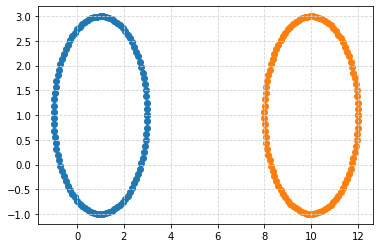

In [99]:
# When the plane is moving on the middle of the torus, the cut off shape is homeomorphic to two holes. (It is actually two circles)
u1=1.     #x-position of the center
u2=10.
v=1.    #y-position of the center
a=2.     #radius on the x-axis
b=2.    #radius on the y-axis

t = np.linspace(0, 2*np.pi, 100)
y1 = u1+a*np.cos(t)
z1 = v+b*np.sin(t)
y2 = u2+a*np.cos(t)

pointCloud21 = np.vstack([y1, z1]).T
pointCloud22 = np.vstack([y2, z1]).T
pointCloud2 = np.vstack([pointCloud21, pointCloud22])

plt.scatter(y1, z1)
plt.scatter(y2, z1)
#plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')
plt.show()

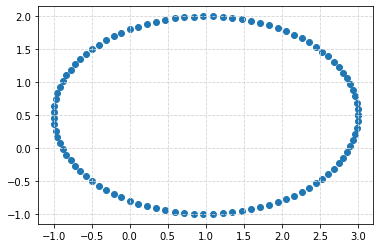

In [100]:
# When the plane is moving on the right end of the torus, the cut off shape is homeomorphic to a hole. (It is actually an ellipse)
u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2.     #radius on the x-axis
b=1.5    #radius on the y-axis

t = np.linspace(0, 2*np.pi, 100)
y = u+a*np.cos(t)
z = v+b*np.sin(t)

pointCloud3 = np.vstack([y, z]).T

plt.scatter(y, z)
#plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')
plt.show()

In [121]:
# When the plane move to the end, there are no cutoff point
pointCloud4 = np.array([])

In [122]:
f1 = d.fill_rips(pointCloud1, 2, 0.2)
f2 = d.fill_rips(pointCloud2, 2, 0.2)
f3 = d.fill_rips(pointCloud3, 2, 0.2)
f4 = d.fill_rips(pointCloud4, 2, 0.2)

dict1 = {0:0, 1:0, 2:0}
dict2 = {0:0, 1:0, 2:0}
dict3 = {0:0, 1:0, 2:0}
dict4 = {0:0, 1:0, 2:0}

p = d.homology_persistence(f1)
dgms = d.init_diagrams(p, f1)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        #print(i, pt.birth, pt.death)
    dict1[i] = featureNum

p = d.homology_persistence(f2)
dgms = d.init_diagrams(p, f2)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        #print(i, pt.birth, pt.death)
    dict2[i] = featureNum

p = d.homology_persistence(f3)
dgms = d.init_diagrams(p, f3)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        #print(i, pt.birth, pt.death)
    dict3[i] = featureNum

p = d.homology_persistence(f4)
dgms = d.init_diagrams(p, f4)
for i, dgm in enumerate(dgms):
    featureNum = 0
    for pt in dgm:
        featureNum += 1
        #print(i, pt.birth, pt.death)
    dict4[i] = featureNum

print (dict1)
print (dict2)
print (dict3)
print (dict4)

{0: 100, 1: 1, 2: 3}
{0: 200, 1: 2, 2: 0}
{0: 100, 1: 1, 2: 3}
{0: 1, 1: 0, 2: 0}


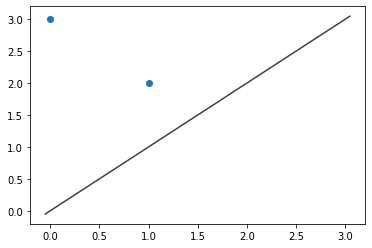

In [123]:
# Then find the barcode
topoFeature = [dict1, dict2, dict3, dict4]
totalBD0 = []
totalBD1 = []

temp0 = [] # work as a stack
for i in range(len(topoFeature)):
    #print (i)
    if topoFeature[i][1] > len(temp0):
        for k in range(len(temp0)):
            temp0[k][-1] += 1
        for j in range(topoFeature[i][1] - len(temp0)):
            temp0.append([i, i+1])
    elif topoFeature[i][1] == len(temp0):
        for k in range(len(temp0)):
            temp0[k][-1] += 1
    elif topoFeature[i][1] < len(temp0):
        for j in range(len(temp0) - topoFeature[i][1]):
            totalBD0.append(temp0[-1])
            temp0.pop()
        for k in range(topoFeature[i][1]):
            temp0[k][-1] += 1

#print (temp0)  
totalBD0 = np.array(totalBD0)

fig, ax = plt.subplots()
ax.scatter(totalBD0[:, 0], totalBD0[:, 1])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.show()

The plot above is the dim1 level set zigzag diagram. It clearly shows when the plane is moving along x axis, it cuts off a hole (this hole is born at begining), and as x increases, the plane moves to the half of the torus, which cuts off 2 holes (so another feature is born at 1). Then the plane moves on the final part of the torus, then we see 1 hole again (the the new born feature dies here at 2 so we have [1, 2] on the diagram). And after the plane finishes the move, it cuts off nothing, which means the earilest born feature dies in the end. So we have another dot [0, 3] on the diagram.


Level set zigzag is not lower star filtration. As mention in Carlsson's paper, it strongly depends on the critical points. 